In [28]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('job_dataset.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1583 entries, 0 to 1582
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   job_title     1583 non-null   object
 1   company       1583 non-null   object
 2   job_location  1583 non-null   object
 3   job_summary   1583 non-null   object
 4   post_date     1583 non-null   object
 5   today         1583 non-null   object
 6   job_salary    405 non-null    object
 7   job_url       1583 non-null   object
dtypes: object(8)
memory usage: 99.1+ KB


In [5]:
df.head()

,job_title,company,job_location,job_summary,post_date,today,job_salary,job_url
0,Technology Lead : Data Science I Machine Learning,Infosys Limited,"Bengaluru, Karnataka",A day in the life of an Infoscion • As part of...,PostedPosted 30+ days ago,2022-07-26,NaN,https://in.indeed.com/pagead/clk?mo=r&ad=-6NYl...
1,"Software Engineer, Machine Learning",Google,"Bengaluru, Karnataka",2 years of relevant work experience in machine...,PostedPosted 30+ days ago,2022-07-26,NaN,https://in.indeed.com/pagead/clk?mo=r&ad=-6NYl...
2,Experienced Over The Shoulder Mechanic- C17,BOEING,"Remote in Air Force Station, Karnataka",This position will focus on supporting the Boe...,PostedPosted 3 days ago,2022-07-26,NaN,https://in.indeed.com/pagead/clk?mo=r&ad=-6NYl...
3,Data Scientist,Infosys Limited,"Bengaluru, Karnataka",Anchor ML development track in a client projec...,PostedPosted 30+ days ago,2022-07-26,NaN,https://in.indeed.com/pagead/clk?mo=r&ad=-6NYl...
4,Python Developer,Infosys Limited,"Bengaluru, Karnataka",Should have a decent understanding of the Mach...,PostedPosted 30+ days ago,2022-07-26,NaN,https://in.indeed.com/pagead/clk?mo=r&ad=-6NYl...


In [6]:
# Cleaning the dataset

# 1. Removing unnecessary columns (keeping 'today' only if needed later)
df_cleaned = df.drop(columns=['job_url'])

# 2. Cleaning the 'post_date' column (removing 'Posted' and converting it to a standardized format)
df_cleaned['post_date'] = df_cleaned['post_date'].str.replace(r'Posted\s*', '', regex=True)

# 3. Handling missing salary values (filling with 'Not Disclosed' for now)
df_cleaned['job_salary'] = df_cleaned['job_salary'].fillna('Not Disclosed')

# 4. Standardizing job titles (converting to lowercase for consistency)
df_cleaned['job_title'] = df_cleaned['job_title'].str.lower().str.strip()

# 5. Standardizing job locations (removing "Remote in" and extra spaces)
df_cleaned['job_location'] = df_cleaned['job_location'].str.replace(r'Remote in ', '', regex=True).str.strip()

# Display cleaned data summary
df_cleaned.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1583 entries, 0 to 1582
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   job_title     1583 non-null   object
 1   company       1583 non-null   object
 2   job_location  1583 non-null   object
 3   job_summary   1583 non-null   object
 4   post_date     1583 non-null   object
 5   today         1583 non-null   object
 6   job_salary    1583 non-null   object
dtypes: object(7)
memory usage: 86.7+ KB


In [7]:
df_cleaned.head()

,job_title,company,job_location,job_summary,post_date,today,job_salary
0,technology lead : data science i machine learning,Infosys Limited,"Bengaluru, Karnataka",A day in the life of an Infoscion • As part of...,30+ days ago,2022-07-26,Not Disclosed
1,"software engineer, machine learning",Google,"Bengaluru, Karnataka",2 years of relevant work experience in machine...,30+ days ago,2022-07-26,Not Disclosed
2,experienced over the shoulder mechanic- c17,BOEING,"Air Force Station, Karnataka",This position will focus on supporting the Boe...,3 days ago,2022-07-26,Not Disclosed
3,data scientist,Infosys Limited,"Bengaluru, Karnataka",Anchor ML development track in a client projec...,30+ days ago,2022-07-26,Not Disclosed
4,python developer,Infosys Limited,"Bengaluru, Karnataka",Should have a decent understanding of the Mach...,30+ days ago,2022-07-26,Not Disclosed


In [17]:
df_cleaned.drop(columns = 'post_date', inplace = True)


In [18]:
# Analyzing most common job titles
job_title_counts = df_cleaned['job_title'].value_counts().head(10)

job_title_counts


job_title
data analyst                 204
data scientist                61
business analyst              39
machine learning engineer     34
data engineer                 25
computer vision engineer      20
senior data analyst           17
data science                  16
data science trainer          13
software engineer              6
Name: count, dtype: int64

In [19]:
# Analyzing most common job locations
job_location_counts = df_cleaned['job_location'].value_counts().head(10)

job_location_counts

job_location
Bengaluru, Karnataka               521
Hyderabad, Telangana               123
Gurgaon, Haryana                   114
Pune, Maharashtra                   87
Mumbai, Maharashtra                 63
India                               58
Remote                              58
Noida, Uttar Pradesh                56
Bengaluru, Karnataka+1 location     51
Chennai, Tamil Nadu                 48
Name: count, dtype: int64

C:\Users\ASUS\AppData\Local\Temp\ipykernel_41076\4213219678.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=job_title_counts.values, y=job_title_counts.index, palette="Blues_r")


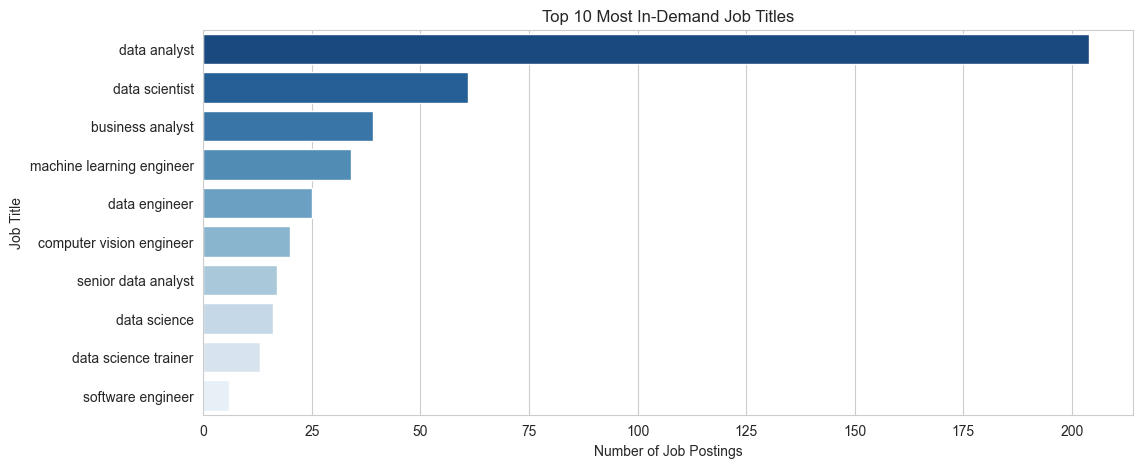

C:\Users\ASUS\AppData\Local\Temp\ipykernel_41076\4213219678.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=job_location_counts.values, y=job_location_counts.index, palette="Greens_r")


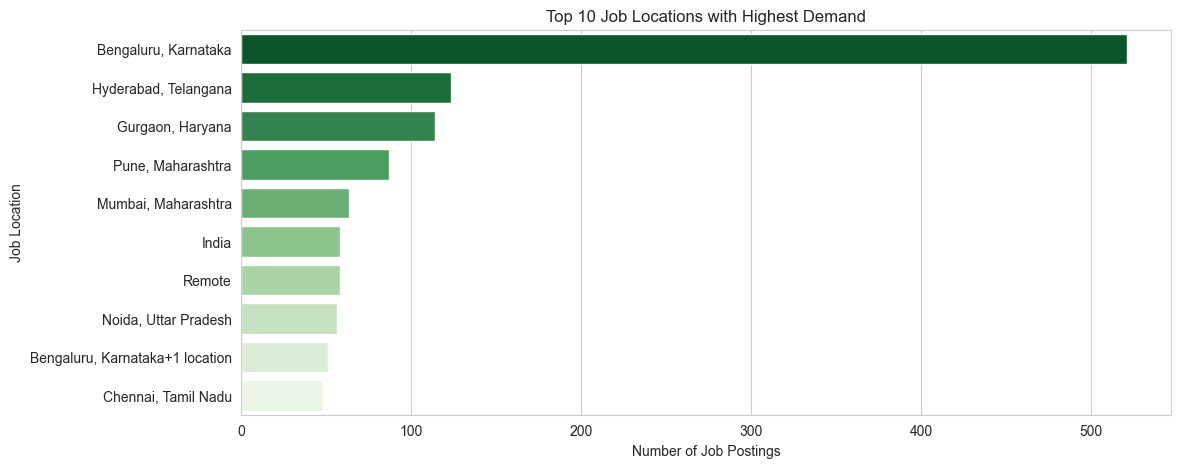

In [20]:
# Set plot style
sns.set_style("whitegrid")

# Plot job title demand
plt.figure(figsize=(12, 5))
sns.barplot(x=job_title_counts.values, y=job_title_counts.index, palette="Blues_r")
plt.xlabel("Number of Job Postings")
plt.ylabel("Job Title")
plt.title("Top 10 Most In-Demand Job Titles")
plt.show()

# Plot job location demand
plt.figure(figsize=(12, 5))
sns.barplot(x=job_location_counts.values, y=job_location_counts.index, palette="Greens_r")
plt.xlabel("Number of Job Postings")
plt.ylabel("Job Location")
plt.title("Top 10 Job Locations with Highest Demand")
plt.show()


C:\Users\ASUS\AppData\Local\Temp\ipykernel_41076\446953718.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_skills_refined["Count"], y=df_skills_refined["Skill"], palette="Oranges_r")


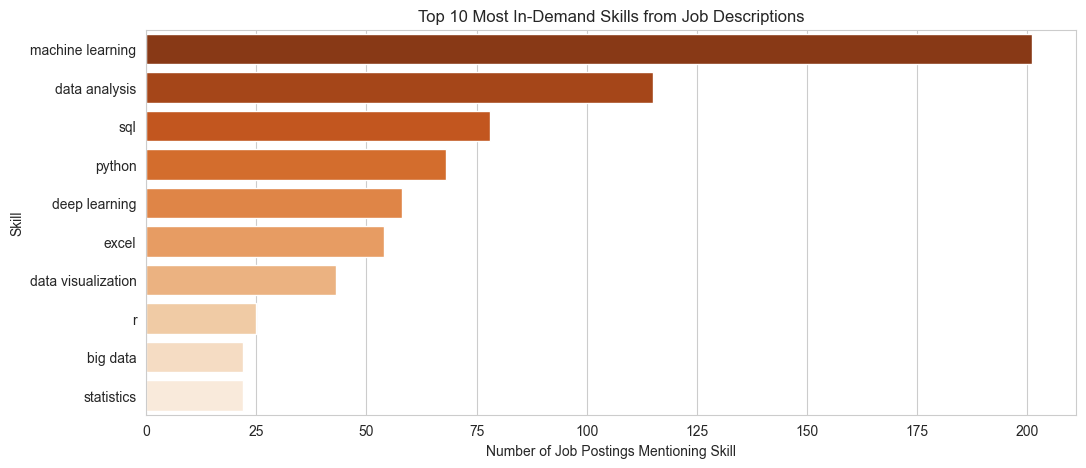

,Skill,Count
0,machine learning,201
1,data analysis,115
2,sql,78
3,python,68
4,deep learning,58
5,excel,54
6,data visualization,43
7,r,25
8,big data,22
9,statistics,22


In [21]:
# Refine skill extraction to avoid false positives (e.g., single-letter "r")
def refined_extract_skills(text):
    if pd.isnull(text):  # Handle missing values
        return []
    text = text.lower()
    skills_found = [skill for skill in common_skills if re.search(rf"\b{skill}\b", text)]
    return skills_found

# Apply refined function
df_cleaned["extracted_skills"] = df_cleaned["job_summary"].apply(refined_extract_skills)

# Recount skills
all_skills_refined = [skill for sublist in df_cleaned["extracted_skills"] for skill in sublist]
skill_counts_refined = Counter(all_skills_refined).most_common(10)

# Convert to DataFrame for visualization
df_skills_refined = pd.DataFrame(skill_counts_refined, columns=["Skill", "Count"])

# Visualize top skills
plt.figure(figsize=(12, 5))
sns.barplot(x=df_skills_refined["Count"], y=df_skills_refined["Skill"], palette="Oranges_r")
plt.xlabel("Number of Job Postings Mentioning Skill")
plt.ylabel("Skill")
plt.title("Top 10 Most In-Demand Skills from Job Descriptions")
plt.show()

# Display refined skill counts
df_skills_refined


In [25]:
df_cleaned['job_salary'].dropna().tolist()

['Not Disclosed',
 'Not Disclosed',
 'Not Disclosed',
 'Not Disclosed',
 'Not Disclosed',
 '₹80,045 a month',
 'Not Disclosed',
 '₹18,00,000 - ₹22,00,000 a year',
 'Not Disclosed',
 'Not Disclosed',
 'Not Disclosed',
 'Not Disclosed',
 '₹15,00,000 - ₹40,00,000 a year',
 'Not Disclosed',
 'Not Disclosed',
 'Not Disclosed',
 '₹2,50,000 - ₹6,50,000 a month',
 'Not Disclosed',
 'Not Disclosed',
 'Not Disclosed',
 'Not Disclosed',
 'Not Disclosed',
 'Not Disclosed',
 '₹12,086 a month',
 'Not Disclosed',
 '₹40,000 - ₹1,20,000 a month',
 '₹6,00,000 - ₹21,60,000 a year',
 'Not Disclosed',
 '₹15,00,000 - ₹20,00,000 a year',
 'Not Disclosed',
 '₹6,00,000 - ₹21,60,000 a year',
 'Not Disclosed',
 '₹15,00,000 - ₹20,00,000 a year',
 'Not Disclosed',
 'Not Disclosed',
 '₹15,00,000 - ₹35,89,623 a year',
 'Not Disclosed',
 '₹20,00,000 - ₹22,00,000 a year',
 '₹1,000 an hour',
 'Not Disclosed',
 '₹12,000 - ₹15,000 a month',
 '₹6,60,027 - ₹25,16,037 a year',
 'Not Disclosed',
 'Not Disclosed',
 'Not Discl

In [32]:
# Function to convert salary text to yearly salary estimate
def convert_to_yearly(salary_text):
    if pd.isnull(salary_text) or "Not Disclosed" in salary_text:
        return np.nan  # Mark missing salaries as NaN

    # Extract numeric salary values
    salary_values = re.findall(r"₹([\d,]+)", salary_text)
    if not salary_values:
        return np.nan

    # Convert extracted values to integers
    salary_values = [int(value.replace(",", "")) for value in salary_values]

    # Take the average if it's a range, otherwise use the single value
    avg_salary = np.mean(salary_values)

    # Determine the salary period (monthly/yearly)
    if "a month" in salary_text:
        return avg_salary * 12  # Convert monthly to yearly
    elif "a year" in salary_text:
        return avg_salary  # Already yearly
    else:
        return np.nan  # Handle unexpected cases

# Apply function to standardize salaries
df_cleaned["yearly_salary"] = df_cleaned["job_salary"].apply(convert_to_yearly)

# Display summary statistics for cleaned salary data
df_cleaned["yearly_salary"].describe().round(2)


count         402.00
mean       898247.51
std        959212.26
min         36000.00
25%        348000.00
50%        600000.00
75%       1200000.00
max      10800000.00
Name: yearly_salary, dtype: float64

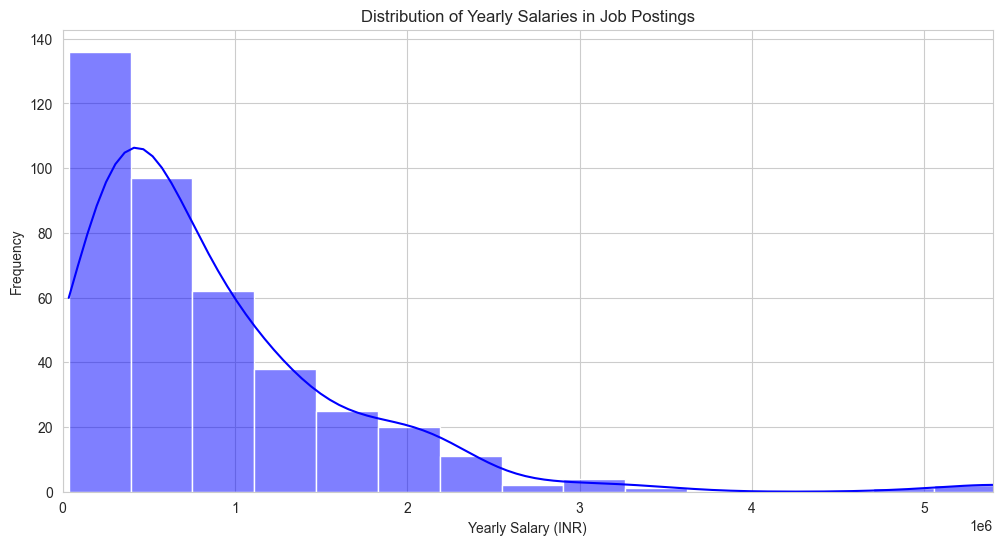

In [33]:
# Plot salary distribution
plt.figure(figsize=(12, 6))
sns.histplot(df_cleaned["yearly_salary"].dropna(), bins=30, kde=True, color="blue")
plt.xlabel("Yearly Salary (INR)")
plt.ylabel("Frequency")
plt.title("Distribution of Yearly Salaries in Job Postings")
plt.xlim(0, df_cleaned["yearly_salary"].quantile(0.99))  # Exclude extreme outliers for better visualization
plt.show()


C:\Users\ASUS\AppData\Local\Temp\ipykernel_41076\2996203528.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_salaries_by_title.values, y=top_salaries_by_title.index, palette="Blues_r")


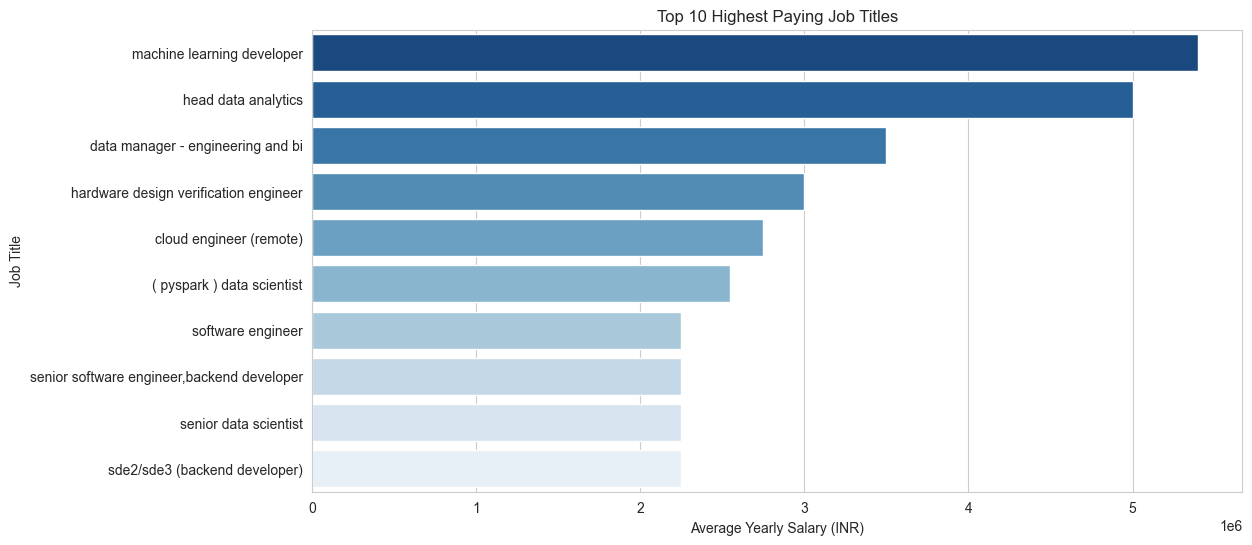

job_location
Andheri, Mumbai, Maharashtra           5400000.00
+1 locationRemote                      2200000.00
Pune, Maharashtra+1 location           1750000.00
Navi Mumbai, Maharashtra+1 location    1500000.00
Bengaluru, Karnataka+1 location        1477250.00
Temporarily Bengaluru, Karnataka       1456903.33
Hyderabad, Telangana                   1382241.10
Vijayanagar, Bengaluru, Karnataka      1300000.00
Temporarily Remote                     1250000.00
Delhi, Delhi                           1214709.62
Name: yearly_salary, dtype: float64

In [35]:
# Compute average salary by job title (top 10 highest paying roles)
top_salaries_by_title = df_cleaned.groupby("job_title")["yearly_salary"].mean().sort_values(ascending=False).head(10)

# Plot top 10 highest-paying job titles
plt.figure(figsize=(12, 6))
sns.barplot(x=top_salaries_by_title.values, y=top_salaries_by_title.index, palette="Blues_r")
plt.xlabel("Average Yearly Salary (INR)")
plt.ylabel("Job Title")
plt.title("Top 10 Highest Paying Job Titles")
plt.show()

# Display salary comparison by location
top_salaries_by_location = df_cleaned.groupby("job_location")["yearly_salary"].mean().sort_values(ascending=False).head(10)
top_salaries_by_location.round(2)


In [38]:
df_cleaned.head()

,job_title,company,job_location,job_summary,today,job_salary,extracted_skills,yearly_salary
0,technology lead : data science i machine learning,Infosys Limited,"Bengaluru, Karnataka",A day in the life of an Infoscion • As part of...,2022-07-26,Not Disclosed,[],NaN
1,"software engineer, machine learning",Google,"Bengaluru, Karnataka",2 years of relevant work experience in machine...,2022-07-26,Not Disclosed,"[machine learning, deep learning]",NaN
2,experienced over the shoulder mechanic- c17,BOEING,"Air Force Station, Karnataka",This position will focus on supporting the Boe...,2022-07-26,Not Disclosed,[],NaN
3,data scientist,Infosys Limited,"Bengaluru, Karnataka",Anchor ML development track in a client projec...,2022-07-26,Not Disclosed,[],NaN
4,python developer,Infosys Limited,"Bengaluru, Karnataka",Should have a decent understanding of the Mach...,2022-07-26,Not Disclosed,[machine learning],NaN
